# Анализ продаж компьютерных игр для планирования рекламных компаний

# Описание проекта

- Заказчик проекта — международный интернет-магазин по продаже компьютерных игр
- Задача проекта — на основе исторических данных о продажах компьютерных игр, рейтингах пользователей, экспертных оценках, жанрах игр и платформах, определить характеристики успешности игры и спланировать рекламные кампании на 2017 год.

# Описание данных

Исследование основано на открытых исторических данных о продажах компьютерных игр до 2016 года

Данные выданы в виде csv-файла.

Таблица games включает следующие поля:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.
Аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, присваивающая возрастной рейтинг компьютерным играм

# Содержание

1. [Шаг 1. Загрузка датасета и подготовка его к анализу](#start)
    * [Вывод:](#start_total)
2. [Шаг 2. Предобработка данных](#preprocessing)
    * [Вывод](#preprocessing_total)
3. [Шаг 3. Исследовательский анализ данных](#analysis)
    * [Вывод](#analisis_total)
4. [Шаг 4. Портрет пользователя каждого региона](#user)
    * [Вывод](#user_total) 
5. [Шаг 5. Проверка гипотез](#hypotesis)
    * [Вывод](#hypotesis_total)
6. [Шаг 6. Общий вывод](#total)

## Шаг 1. Загрузка датасета и подготовка его к анализу<a id="start"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats as st
from functools import reduce
from pandas.plotting import scatter_matrix
from scipy.stats import bartlett


# <чтение файла с данными с сохранением в data>
data = pd.read_csv('...')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [2]:
# <получение информации о типах данных в таблице>
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# <получение информации о пропусках в таблице>
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [4]:
# <Использование метода describe() для столбцов таблицы>
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод:<a id="start_total"></a>

Импортировали необходимые библиотеки, первично просмотрели информацию: в данных есть есть пропуски, в таблице 16715 строк.

## Шаг 2. Предобработка данных<a id="preprocessing"></a>

Замените названия столбцов (приведите к нижнему регистру)

In [5]:
# <Применяем метод map(function, iterable) для приведения названий столбцов к нижнему регистру>
data.columns = map(str.lower, data.columns)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;


In [6]:
# <получение информации о пропусках в таблице>
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Приводим столбец year_of_release к целочисленному типу, потому что месяцы не учитываются
- Не приводим к целочисленному типу столбцы с продажами, поскольку это исказит данные
- Приводим столбец critic_score к целочисленному типу, поскольку в данных по баллам нет дробных значений
- Приводим столбец user_score к типу Float64, заменяя значение tbd на NaN

In [7]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
1.1       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;


- В столбце user_score обнаружили 2424 значения tbd, означающие "подлежит уточнению". Заменяем эти значения на NaN 

In [8]:
# <Заменяем значения tbd на NaN И меняем тип данных на Float64> 
data['user_score'] = np.where(data['user_score'] == 'tbd', 'NaN', data['user_score'])
data['user_score'] = data['user_score'].astype('Float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;


In [9]:
# <получение информации о пропусках в таблице>
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Пропуски в столбцах name, year_of_release и genre удаляем, поскольку они занимают меньше 2% от всех данных

In [10]:
data.isnull().sum()/len(data)*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

In [11]:
# <Удаляем пропуски в столбце name >
data.dropna(subset = ['name'], inplace = True)

# Проверка наличия пропусков

data['name'].isnull().sum()
#Пропусков в столбце name не осталось

0

In [12]:
# <Удаляем пропуски в столбце year_of_release >
data.dropna(subset = ['year_of_release'], inplace = True)

# Проверка наличия пропусков

data['year_of_release'].isnull().sum()
#Пропусков в столбце year_of_release не осталось

0

In [13]:
# <Удаляем пропуски в столбце genre >
data.dropna(subset = ['genre'], inplace = True)

# Проверка наличия пропусков

data['genre'].isnull().sum()
#Пропусков в столбце genre не осталось

0

Осталось достаточно большое количество пропусков, рассмотрим корреляцию у столбцов таблицы

In [14]:
data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.092326,0.004045,-0.168477,0.037821,0.011411,-0.267851
na_sales,-0.092326,1.000000,0.766546,0.451162,0.638479,0.240083,0.085549
eu_sales,0.004045,0.766546,1.000000,0.435894,0.722679,0.221276,0.055530
jp_sales,-0.168477,0.451162,0.435894,1.000000,0.291562,0.153474,0.126372
other_sales,0.037821,0.638479,0.722679,0.291562,1.000000,0.198410,0.056935
critic_score,0.011411,0.240083,0.221276,0.153474,0.198410,1.000000,0.579671
user_score,-0.267851,0.085549,0.055530,0.126372,0.056935,0.579671,1.000000


Используем данную ниже таблицу для определения степени корреляции:

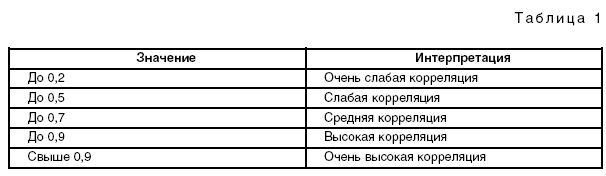

In [15]:
# <получение информации о пропусках в таблице>
data.isnull().sum()

# <НЕ избавляемся от пропусков в столбцах critic_score и user_score, поскольку до 0,7 - средняя корреляция> 

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Пропуски в столбце rating оставляем без изменений, поскольку нет сильно коррелирующих с ним показателей

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [16]:
# <Добавляем столбец total_sales суммируя все данные по продажам в разных регионах>
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Рассмотрим выбросы в столбцах с пропусками

In [17]:
# <приводим все значения с текстовых строках таблицы к нижнему регистру>
list_of_columns = ['name', 'platform', 'genre', 'rating']
for column in list_of_columns:
    data[column] = data[column].str.lower()

# <получение суммарного количества дубликатов в таблице >
data.duplicated(keep = False).sum()

# <Автоматическая обработка дубликатов не выявила>

0

In [18]:
# <изучаем категории рейтинга>
data['rating'].value_counts()

e       3921
t       2905
m       1536
e10+    1393
ec         8
k-a        3
ao         1
rp         1
Name: rating, dtype: int64

In [19]:
data['rating'].value_counts()/len(data['rating'])*100

e       23.844563
t       17.666018
m        9.340793
e10+     8.471175
ec       0.048650
k-a      0.018244
ao       0.006081
rp       0.006081
Name: rating, dtype: float64

### Вывод <a id="preprocessing_total"></a>

Преобразовали данные в нужные типы. 

Изменили аббревиатуру 'tbd' в столбцах с рейтингом на NaN, обработали пропуски:
- в столбцах name, year_of_release и genre удалили, поскольку они занимают меньше 2 % от всех данных
- в столбцах critic_score, user_score и rating пропуски оставили без изменений. 

## Шаг 3. Исследовательский анализ данных<a id="analysis"></a>

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

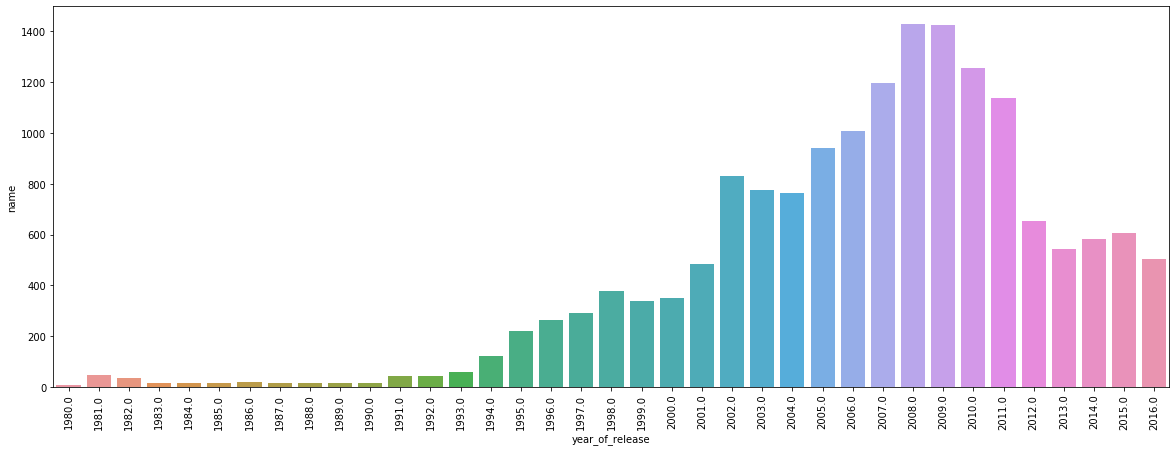

In [20]:
# <строим гистограмму по сводной таблице: количество новых игр за каждый год>
data_pivot_years = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index()
plt.figure(figsize = (20,7))
plt.xticks(rotation=90)
sns.barplot(data=data_pivot_years, x='year_of_release', y='name')

- На гистограмме видно, что за десятилетие с 1980 по 2000 годы выпускалось меньше всего игр, индустрия была еще не так развита.

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


In [21]:
# <создаем сводную таблицу с платформами с максимальными продажами за все время>
data_pivot_platforms = data.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum').reset_index()
data_pivot_platforms = data_pivot_platforms.sort_values(by = 'total_sales', ascending = False).head(10)
data_pivot_platforms

,platform,total_sales
16,ps2,1233.56
28,x360,961.24
17,ps3,931.34
25,wii,891.18
4,ds,802.78
15,ps,727.58
18,ps4,314.14
6,gba,312.88
19,psp,289.53
2,3ds,257.81


In [22]:
# <создаем сводную таблицу с платформами с максимальными годами продаж>
data_pivot_years_max = data.pivot_table(index = ['platform'], 
                                    values = 'year_of_release',
                                    aggfunc = 'max').reset_index()

# <Переименовывание названия столбца year_of_release в year_max>
data_pivot_years_max.rename(columns={'year_of_release': 'year_max'}, inplace=True)
data_pivot_years_max.head()

,platform,year_max
0,2600,1989.0
1,3do,1995.0
2,3ds,2016.0
3,dc,2008.0
4,ds,2013.0


In [23]:
# <создаем сводную таблицу с платформами с минимальными годами продаж>
data_pivot_years_min = data.pivot_table(index = ['platform'], 
                                    values = 'year_of_release',
                                    aggfunc = 'min').reset_index()

# <Переименовывание названия столбца duration_x в duration_sum>
data_pivot_years_min.rename(columns={'year_of_release': 'year_min'}, inplace=True)
data_pivot_years_min.head()

,platform,year_min
0,2600,1980.0
1,3do,1994.0
2,3ds,2011.0
3,dc,1998.0
4,ds,1985.0


In [24]:
# <создаем сводную таблицу с помощью метода merge>
data_platforms_years = [data_pivot_platforms, data_pivot_years_min, data_pivot_years_max]
data_merged = reduce(lambda  left,right: pd.merge(left,right,on=['platform'],
                                            how='left'), data_platforms_years)
data_merged

,platform,total_sales,year_min,year_max
0,ps2,1233.56,2000.0,2011.0
1,x360,961.24,2005.0,2016.0
2,ps3,931.34,2006.0,2016.0
3,wii,891.18,2006.0,2016.0
4,ds,802.78,1985.0,2013.0
5,ps,727.58,1994.0,2003.0
6,ps4,314.14,2013.0,2016.0
7,gba,312.88,2000.0,2007.0
8,psp,289.53,2004.0,2015.0
9,3ds,257.81,2011.0,2016.0


In [25]:
# <Добавляем столбец с продолжительностью выпуска платформами новых игр>
data_merged['year_duration'] = data_merged['year_max'] - data_merged['year_min']
data_merged

,platform,total_sales,year_min,year_max,year_duration
0,ps2,1233.56,2000.0,2011.0,11.0
1,x360,961.24,2005.0,2016.0,11.0
2,ps3,931.34,2006.0,2016.0,10.0
3,wii,891.18,2006.0,2016.0,10.0
4,ds,802.78,1985.0,2013.0,28.0
5,ps,727.58,1994.0,2003.0,9.0
6,ps4,314.14,2013.0,2016.0,3.0
7,gba,312.88,2000.0,2007.0,7.0
8,psp,289.53,2004.0,2015.0,11.0
9,3ds,257.81,2011.0,2016.0,5.0


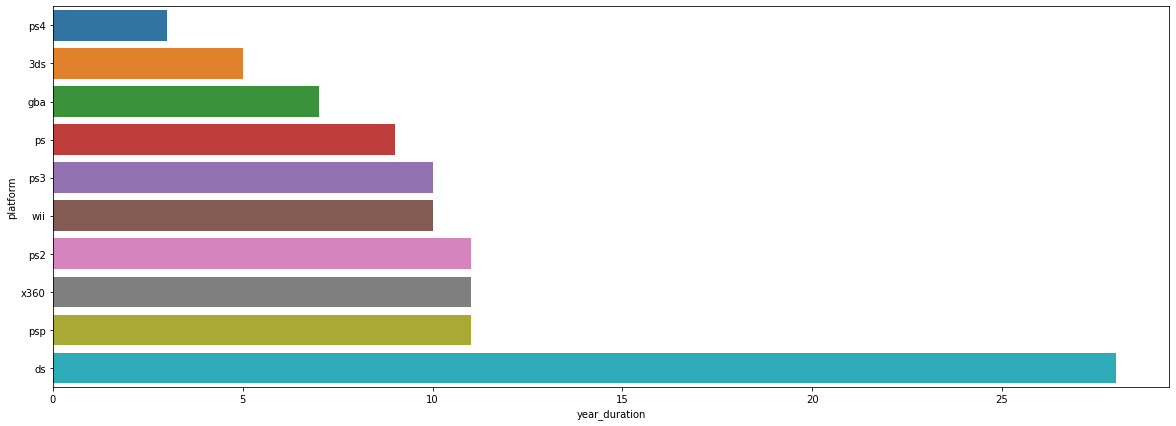

In [26]:
# <Создаем гистограмму с продолжительностью выпуска платформами новых игр>
plt.figure(figsize = (20,7))
sns.barplot(data=data_merged.sort_values(by = 'year_duration'), x='year_duration', y='platform')

(2000, 2020)

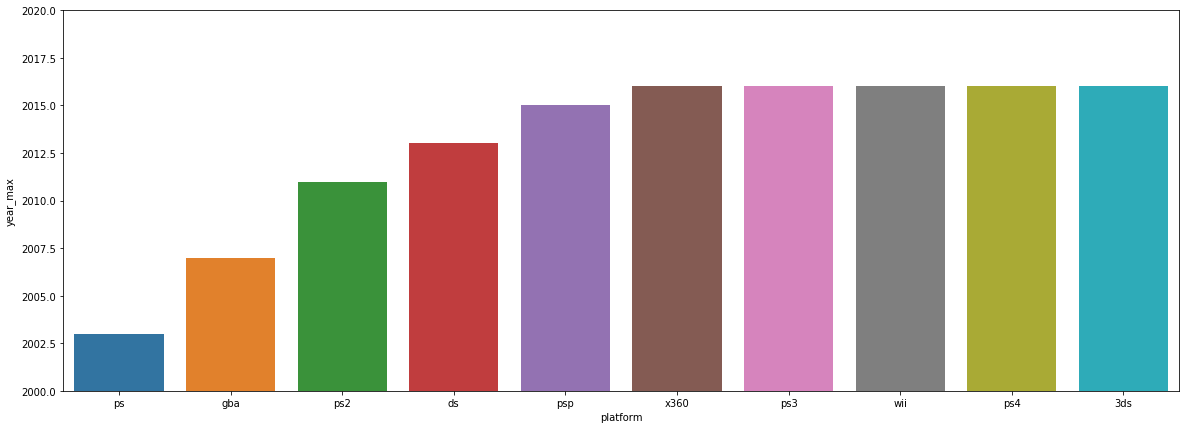

In [27]:
plt.figure(figsize = (20,7))
sns.barplot(data=data_merged.sort_values(by = 'year_max'), x='platform', y='year_max').set_ylim(2000, 2020)

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

In [28]:
# <Считаем среднее значение продолжительноти выпуска новых игр платформой>
data_merged['year_duration'].mean()

10.5

Средний срок жизни одной платформы равен 10.5 лет

С учетом роста количества видеоигр с 2000 по 2011 годы, за актуальный период стоит взять 5 лет с 2012 по 2016 годы включительно, когда рынок видеоигр скорректировался. 

In [29]:
data = data.merge(data_pivot_years_max, on='platform', how='left')

data = data.query('year_of_release >= 2012')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_max
16,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05,2016.0
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27,2016.0
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63,2016.0
33,pokemon x/pokemon y,3ds,2013.0,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60,2016.0
34,call of duty: black ops ii,ps3,2012.0,shooter,4.99,5.73,0.65,2.42,83.0,5.3,m,13.79,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16432,strawberry nauts,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,2016.0
16436,aiyoku no eustia,psv,2014.0,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,2016.0
16439,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,2016.0
16441,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,2016.0


Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


In [30]:
# < создаем свобную таблицу топ-10 платформ по кол-ву продаж>
data_pivot_platforms_leaders = data.query('year_of_release == 2015 or year_of_release == 2016').pivot_table(index = ['platform','year_of_release'], values = ['total_sales'], aggfunc = 'sum').reset_index()
data_pivot_platforms_leaders.sort_values(by='total_sales').set_index('platform').reset_index()

,platform,year_of_release,total_sales
0,psp,2015.0,0.12
1,wii,2016.0,0.18
2,wii,2015.0,1.14
3,x360,2016.0,1.52
4,ps3,2016.0,3.60
5,psv,2016.0,4.25
6,wiiu,2016.0,4.60
7,pc,2016.0,5.25
8,psv,2015.0,6.25
9,pc,2015.0,8.52


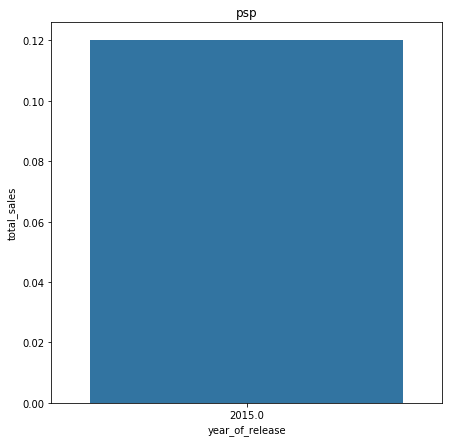

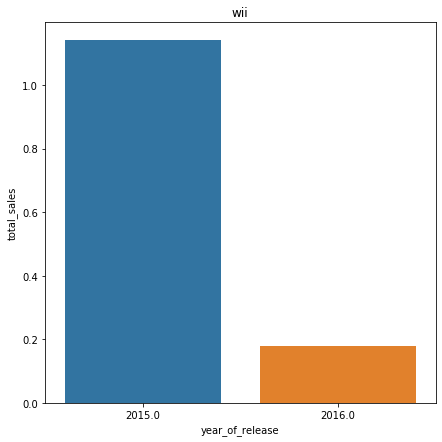

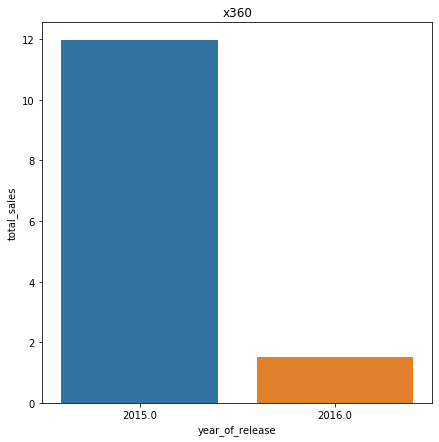

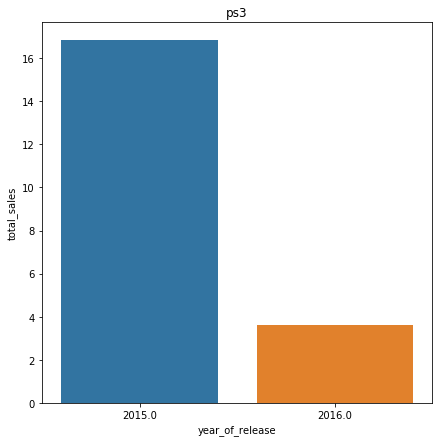

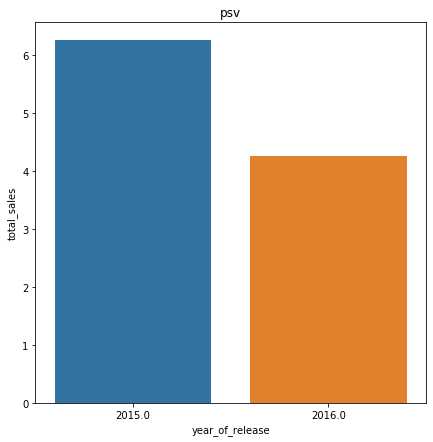

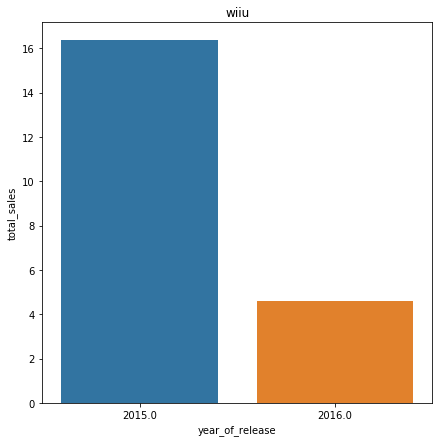

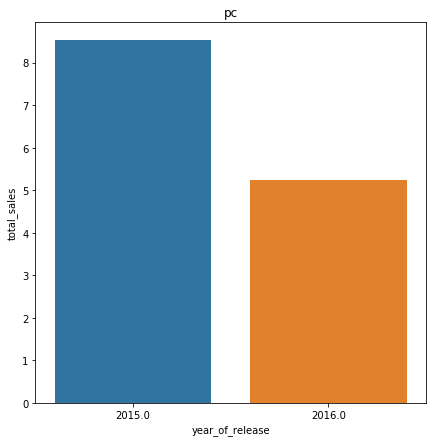

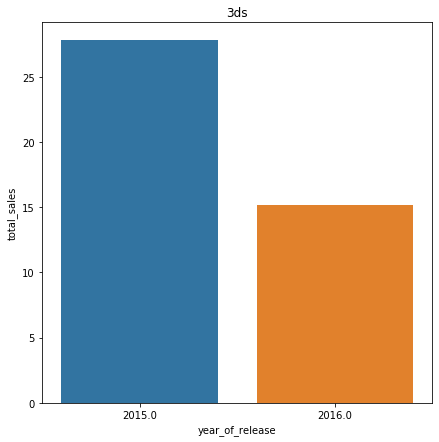

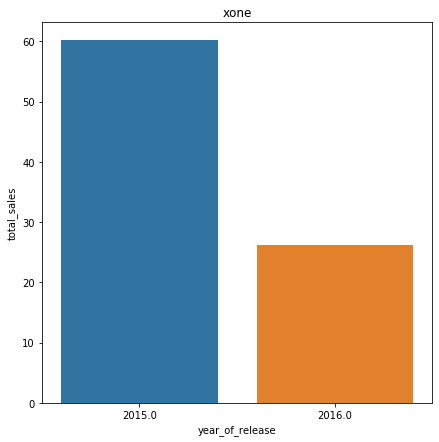

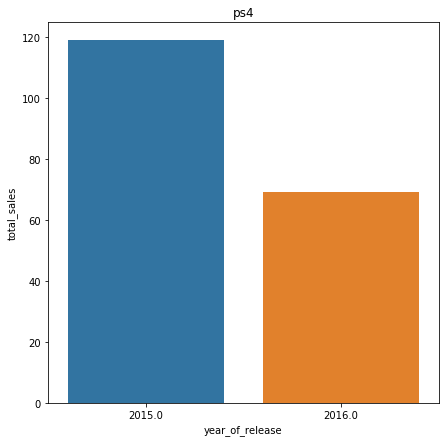

In [31]:
# Строим гистрограммы по 2015 и 2016 годам для каждой платформы из топ10
for i in list(data_pivot_platforms_leaders.sort_values(by='total_sales').set_index('platform').index.unique()):
    plt.figure(figsize = (7,7))
    plt.title(i)
    sns.barplot(data=data_pivot_platforms_leaders.query('platform == @i'), x='year_of_release', y='total_sales')

Лидирует по продажам за 2015-2016 года PS4.

Потенциально прибыльными также являются следующие платформы:  
- xone,
- 3ds, 
- pc. 

(считала потенциально прибыльными платформы с продажами в 2016 году больше 5)

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.


(0, 5)

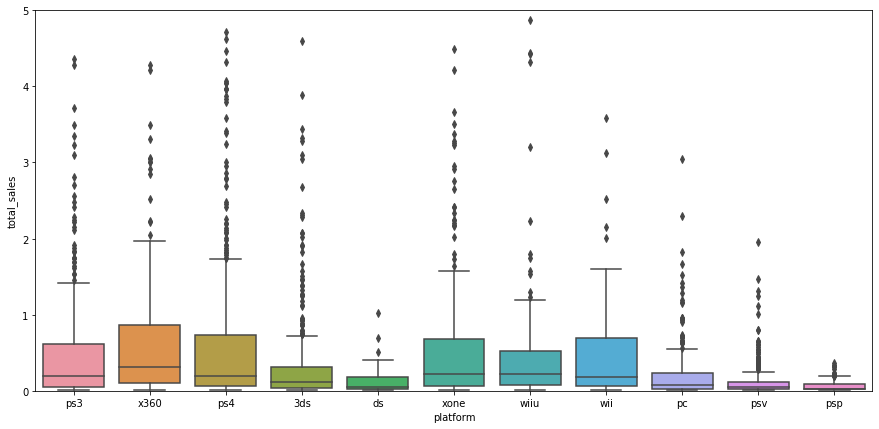

In [32]:
# < создаем диаграмму размаха платформ по кол-ву продаж>
plt.figure(figsize = (15,7))
sns.boxplot(data=data, x='platform', y='total_sales')
plt.ylim(0, 5)


- x360 имеет наибольшие средние продажи (по медиане)
- ps3, ps4, xone, wii и wiiu идут на вторых позициях
- psv и psp продаются меньше всего

- Наибольшие различия между продажами игр на одной платформе - у платформ wii, ds, x360, ps3, ps4 и 3ds.
    
- На основании наличия выбросов (здесь выбросы - популярные игры - бестселлеры) можно сделать вывод, что значительная часть объема продаж делается за счет этих выбросов (например, так происходит у 3ds). В то же время у x360, XOne и wii ситуация иная: большой бокс, длинный ус и мало выбросов. Это свидетельствует о том, что этих платформах покупают самые разные игры, причем, в немалом количестве.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


In [33]:
# < рассмотрим корреляцию платформы ps3>
data_ps3 = data.query('platform == "ps3"')
data_ps3 = data_ps3[['platform','critic_score', 'user_score', 'total_sales', 'rating']].dropna()
data_ps3[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.543369,0.330984
user_score,0.543369,1.000000,0.005484
total_sales,0.330984,0.005484,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A537EA7E88>,
      dtype=object)

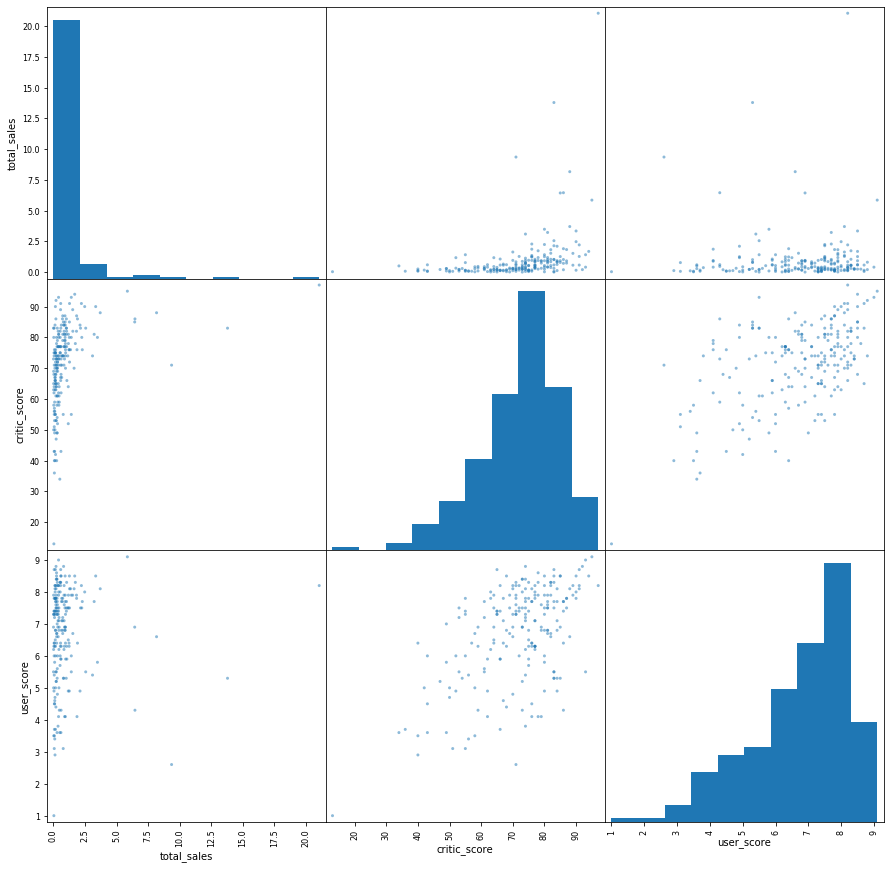

In [34]:
# <Построим диаграмму рассеяния>

ps3 = data.query('platform =="ps3"') 
q = ps3.loc[:,['total_sales', 'critic_score', 'user_score']].dropna()

q = q.astype({
    'critic_score':'int64',
    'user_score': 'float64',
})

pd.plotting.scatter_matrix(q, figsize=(15, 15))

- На платформе ps3 глобальные продажи имеют зависимость 0,33 от мнений критиков
- От отзывов пользователей глобальные продажи почти не зависят
- С учетом того, что корреляция до 0,5 считается низкой, можно предположить, что общие продажи почти не зависят от оценок критиков и пользователей. Также следует учитывать, что критиков меньше, чем пользователей и они редко ставят низкие оценки.

Соотнесите выводы с продажами игр на других платформах.


In [35]:
# < рассмотрим корреляцию по всем платформам>
data[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.517727,0.308197
user_score,0.517727,1.000000,0.004429
total_sales,0.308197,0.004429,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A5396AEC88>,
      dtype=object)

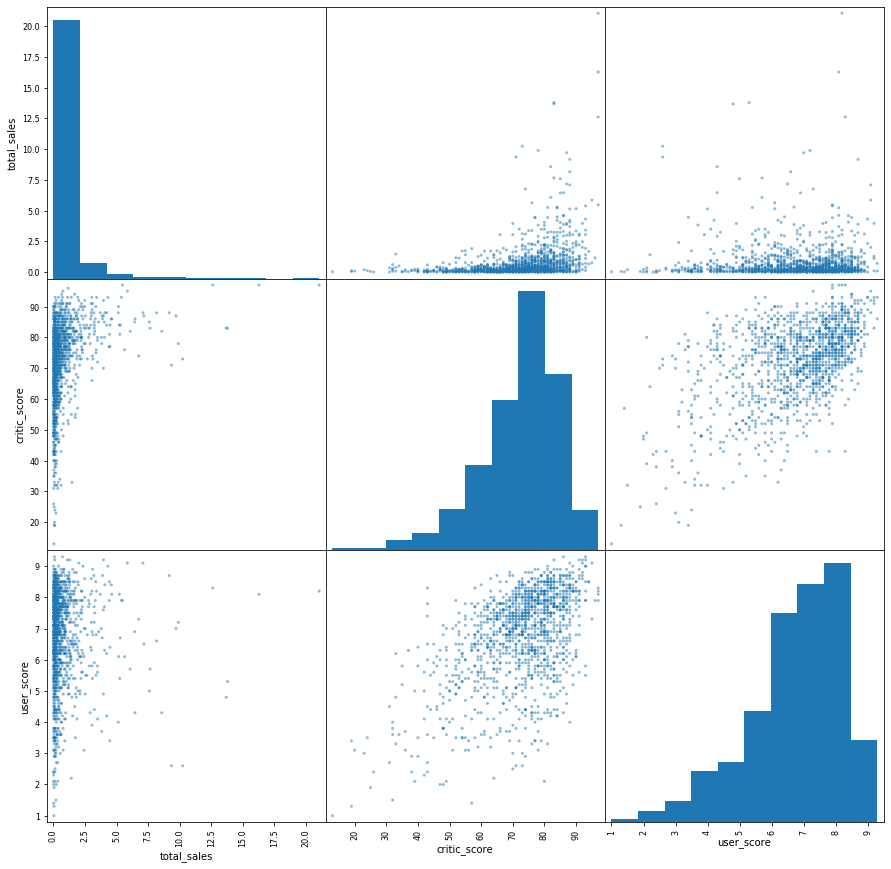

In [36]:
# <Построим диаграмму рассеяния>

data_scatter = data.loc[:,['total_sales', 'critic_score', 'user_score']].dropna()

data_scatter = data_scatter.astype({
    'critic_score':'int64',
    'user_score': 'float64',
})
pd.plotting.scatter_matrix(data_scatter, figsize=(15, 15))

- На платформах в целом глобальные продажи имеют наибольшую зависимость от мнений критиков (но в 1,5 раза ниже, чем на конкретной платформе ps3)
- От отзывов пользователей глобальные продажи на всех платформах зависят меньше (корреляция 1.2)

- На платформах в целом и на платформе ps3 в частности глобальные продажи имеют приблизительно одинаковую зависимость как от мнений критиков, так и от мнений пользователей.
- С учетом того, что корреляция до 0,5 считается низкой, можно предположить, что общие продажи почти не зависят от оценок критиков и пользователей.


Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [37]:
# < создаем сводную таблицу топ-10 платформ по жанрам>
data_pivot_genres = data.pivot_table(index = ['genre'], values = 'total_sales', aggfunc = 'sum').reset_index()
data_pivot_genres = data_pivot_genres.sort_values(by = 'total_sales', ascending = False).head(10)
data_pivot_genres

,genre,total_sales
0,action,441.12
8,shooter,304.73
7,role-playing,192.80
10,sports,181.07
3,misc,85.04
4,platform,61.00
6,racing,53.50
2,fighting,44.49
9,simulation,35.12
1,adventure,29.43


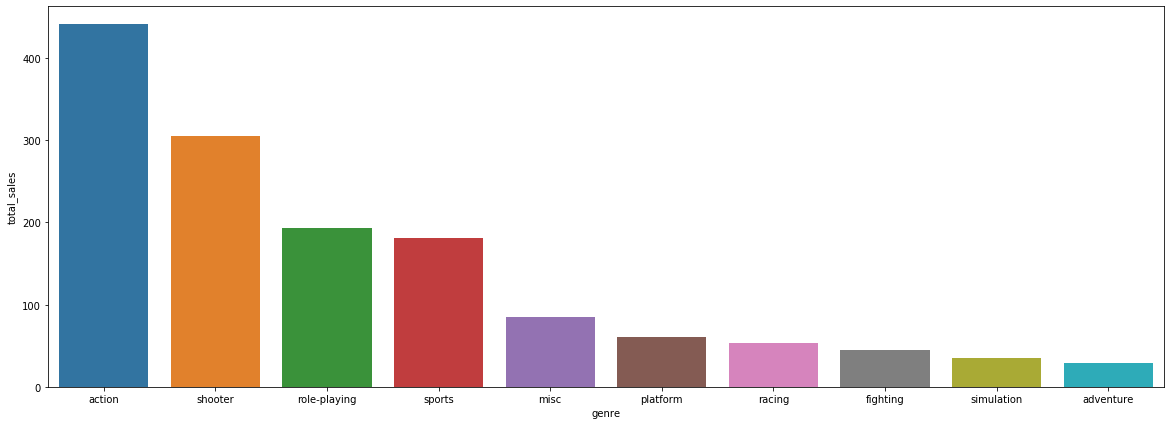

In [38]:
# < создаем гиатограмму топ-10 платформ по жанрам>
plt.figure(figsize = (20,7))
sns.barplot(data=data_pivot_genres, x='genre', y='total_sales')

In [39]:
# < создаем сводную таблицу топ-10 платформ по жанрам>
data_pivot_genres_median = data.pivot_table(index = ['genre'], values = 'total_sales', aggfunc = 'median').reset_index()
data_pivot_genres_median = data_pivot_genres_median.sort_values(by = 'total_sales', ascending = False).head(10)
data_pivot_genres_median

,genre,total_sales
8,shooter,0.44
10,sports,0.24
4,platform,0.21
7,role-playing,0.14
6,racing,0.14
2,fighting,0.13
0,action,0.12
3,misc,0.12
9,simulation,0.12
11,strategy,0.08


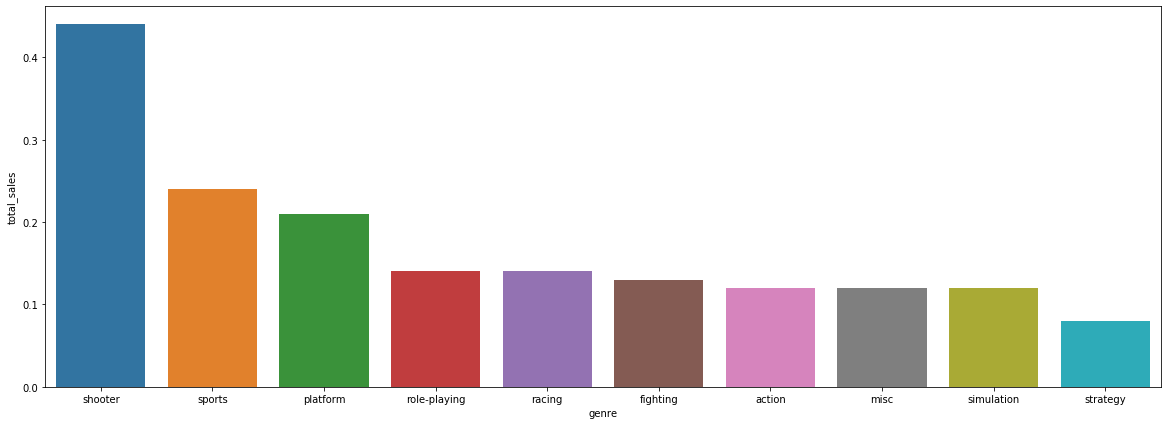

In [40]:
# < создаем гиатограмму топ-10 платформ по жанрам>
plt.figure(figsize = (20,7))
sns.barplot(data=data_pivot_genres_median, x='genre', y='total_sales')

При суммарных продажах выделяются:
- жанр action, который занимает лидирующие позиции
- жанр adventure, который покупают меньше всего.

При расчете продаж на единицу игры лидирует жанр shooter, а жанр strategy стоит на почетном последнем месте.

### Вывод<a id="analisis_total"></a>

За десятилетие с 1980 по 2000 годы выпускалось меньше всего игр, индустрия была еще не так развита.

Средний срок жизни одной платформы равен 10.5 лет.

Взяли за актуальный период 2012-2016 гг.

Лидирует по продажам за 2015-2016 года PS4.

Потенциально прибыльными (помимо PS4) являются следующие платформы: xone, 3ds, pc.

в целом за 2012-2016 года 
x360 имеет наибольшие средние продажи (по медиане)
ps3, ps4, xone, wii и wiiu идут на вторых позициях
psv и psp продаются меньше всего

Зависимость от мнений критиков и от мнений пользователей почти не влияет на продажи игр.

## Шаг 4. Портрет пользователя каждого региона<a id="user"></a>

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.


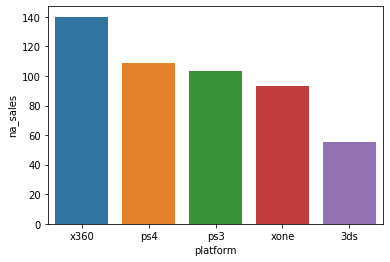

In [41]:
# < создаем сводную таблицу топ-5 платформ по продажам в регионе na >
pivot_na = data.pivot_table(index = ['platform'], values = 'na_sales', aggfunc = 'sum').reset_index()
pivot_na = pivot_na.sort_values(by = 'na_sales', ascending = False).head()

# < создаем гистограмму топ-5 платформ по продажам в регионе na >
sns.barplot(data=pivot_na, x='platform', y='na_sales')

Наиболее популярными платформами для региона Северной Америки являются x360 и ps4.
Ps3, xone и 3ds менее популярны.

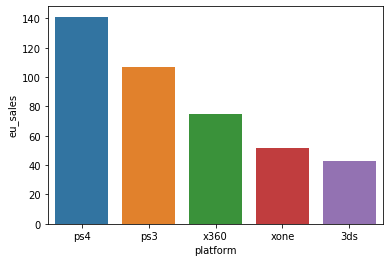

In [42]:
# < создаем сводную таблицу топ-5 платформ по продажам в регионе eu >
pivot_eu = data.pivot_table(index = ['platform'], values = 'eu_sales', aggfunc = 'sum').reset_index()
pivot_eu = pivot_eu.sort_values(by = 'eu_sales', ascending = False).head()

# < создаем гистограмму топ-5 платформ по продажам в регионе eu >
sns.barplot(data=pivot_eu, x='platform', y='eu_sales')

В Европе более популярны ps4 и ps3.
А xone и 3ds снова менее популярны

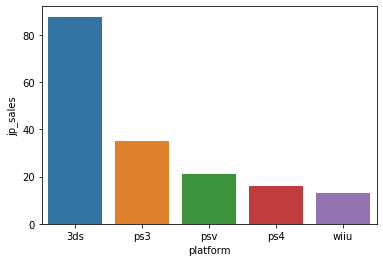

In [43]:
# < создаем сводную таблицу топ-5 платформ по продажам в регионе jp >
pivot_jp = data.pivot_table(index = ['platform'], values = 'jp_sales', aggfunc = 'sum').reset_index()
pivot_jp = pivot_jp.sort_values(by = 'jp_sales', ascending = False).head()

# < создаем гистограмму топ-5 платформ по продажам в регионе jp >
sns.barplot(data=pivot_jp, x='platform', y='jp_sales')

В Японии на первом месте платформа 3ds, а ps3 и ps4, которые популярны в Северной Америке и Европе, здесь стоит на втором и четвертом местах по популярности.

- Самые популярные жанры (топ-5). Поясните разницу.


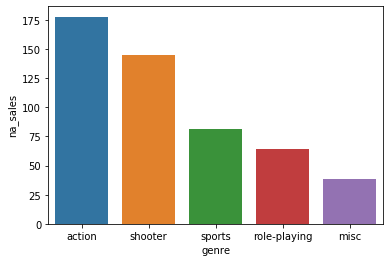

In [44]:
# < создаем сводную таблицу топ-5 жанров по продажам в регионе na >
pivot_genre_na = data.pivot_table(index = ['genre'], values = 'na_sales', aggfunc = 'sum').reset_index()
pivot_genre_na = pivot_genre_na.sort_values(by = 'na_sales', ascending = False).head()

# < создаем гистограмму топ-5 жанров по продажам в регионе na >
sns.barplot(data=pivot_genre_na, x='genre', y='na_sales')

Наиболее популярны жанры action, shooter и sports, жанр misc интересен пользователям северной америки меньше всего (из топ 5 жанров)

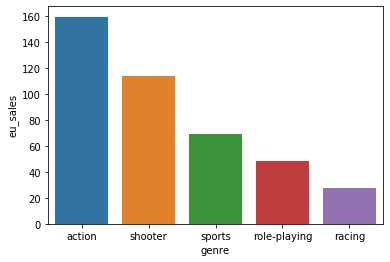

In [45]:
# < создаем сводную таблицу топ-5 жанров по продажам в регионе eu>
pivot_genre_eu = data.pivot_table(index = ['genre'], values = 'eu_sales', aggfunc = 'sum').reset_index()
pivot_genre_eu = pivot_genre_eu.sort_values(by = 'eu_sales', ascending = False).head()

# < создаем гистограмму топ-5 жанров по продажам в регионе eu >
sns.barplot(data=pivot_genre_eu, x='genre', y='eu_sales')

В Европе наиболее популярны жанры action, shooter и sports, жанр racing интересен меньше всего (из топ-5)

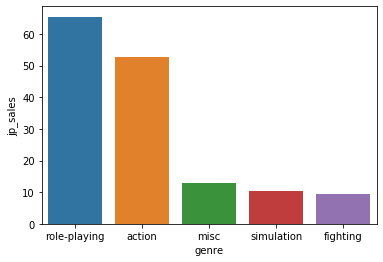

In [46]:
# < создаем сводную таблицу топ-5 жанров по продажам в регионе jp>
pivot_genre_jp = data.pivot_table(index = ['genre'], values = 'jp_sales', aggfunc = 'sum').reset_index()
pivot_genre_jp = pivot_genre_jp.sort_values(by = 'jp_sales', ascending = False).head()

# < создаем гистограмму топ-5 жанров по продажам в регионе eu >
sns.barplot(data=pivot_genre_jp, x='genre', y='jp_sales')

В Японии наиболее популярен жанр role-playing, однако жанр action тоже популярен и стоит на втором месте.

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

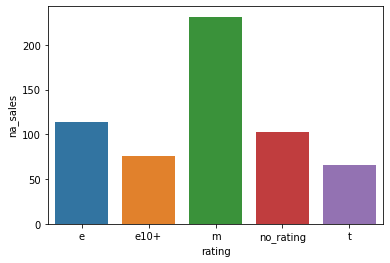

In [47]:
# < заменим отсутствующий возрастной рейтинг на маркерное значение no_rating>
data['rating'].fillna('no_rating', inplace=True)

# < создаем сводную таблицу по рейтингу в регионе na>
data_rating_na = data.pivot_table(index = ['rating'], values = ['na_sales'], aggfunc = 'sum').reset_index()

# < создаем гистограмму по рейтингу в регионе na>
sns.barplot(data=data_rating_na, x='rating', y='na_sales')

- Наиболее популярны игры в Северной Америке с рейтингом «Mature», 
- На втором месте игры «E» - они подходят для всех категорий пользователей.
- Игры для детей и подростков популярны меньше всего.

Игры «no_rating» имеют приблизительно столько же продаж, сколько и игры для всех «Everyone 10 and older»

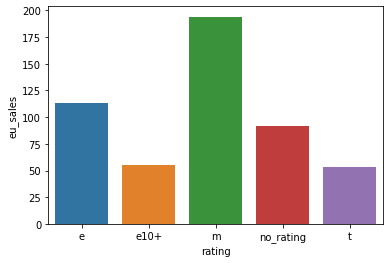

In [48]:
# < создаем сводную таблицу по рейтингу в регионе eu>

data_rating_eu = data.pivot_table(index = ['rating'], values = ['eu_sales'], aggfunc = 'sum').reset_index()

# < создаем гистограмму по рейтингу в регионе eu>
sns.barplot(data=data_rating_eu, x='rating', y='eu_sales')

- Наиболее популярны игры в Европе с рейтингом «Mature», их продажи почти в 2 раза больше, чем у следующей по популярности категории игр «E»
- На втором месте игры «E» - они подходят для всех категорий пользователей.
- Игры для детей и подростков популярны меньше всего.

Игр «no_rating» достаточно много - их больше, чем игр для детей и подростков

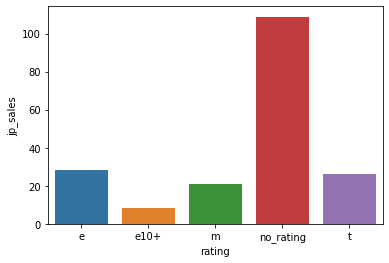

In [49]:
# < создаем сводную таблицу по рейтингу в регионе jp>

data_rating_jp = data.pivot_table(index = ['rating'], values = ['jp_sales'], aggfunc = 'sum').reset_index()

# < создаем гистограмму по рейтингу в регионе jp>
sns.barplot(data=data_rating_jp, x='rating', y='jp_sales')

- Наиболее популярны игры в Японии с рейтингом «Everyone», они подходят для всех пользователей, поэтому продаются лучше.
- «Teen» - на втором месте, подходят для подростков и старше.

В Японии по сравнению с Северной Америкой и Европой намного больше игр, в которых не указан рейтинг, их больше, чем всех остальных игр вместе взятых. Скорее всего это связано с тем, что ESRB работает только на территории СА, в Японии есть аналогичная организация: CERO. Возможно наша таблица - это склейка двух таблиц: продажи на Западе и на Востоке. И разница в рынках (восточный и западный) наталкивает на мысль о неслучайности пропусков.    

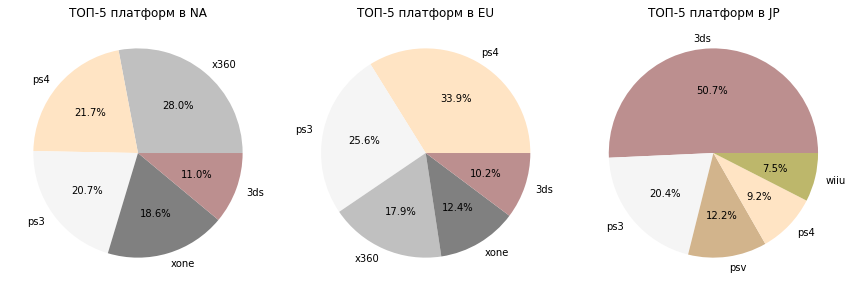

In [50]:
# С помощью словаря задаем цвета для каждой платформы и создаем функцию, 
# которая выводит круговую диаграмму топ-5 платформ в регионах 

def the_func(col1, name1, col2, name2, col3, name3):
    
    cls = {'ps4': 'bisque', 'xone': 'grey', 'x360':'silver', 
           'ps3':'whitesmoke', '3ds':'rosybrown', 'psv':'tan', 'wiiu':'darkkhaki', 'wii':'plum', 'pc':'palevioletred'}
    
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(1,3,1)
    ax2 = fig.add_subplot(1,3,2)
    ax3 = fig.add_subplot(1,3,3)

    ax1.set_title(name1)
    ax1.pie(col1, autopct='%1.1f%%', labels = col1.index, colors = [cls[key] for key in col1.index])


    ax2.set_title(name2)
    ax2.pie(col2, autopct='%1.1f%%', labels = col2.index, colors = [cls[key] for key in col2.index])


    ax3.set_title(name3)
    ax3.pie(col3, autopct='%1.1f%%', labels = col3.index, colors = [cls[key] for key in col3.index])
#   ax3.bar(col3.index, col3,  color = [cls[key] for key in col3.index])

    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    
    
the_func(pivot_na.set_index('platform')['na_sales'].head(), 'ТОП-5 платформ в NA', 
         pivot_eu.set_index('platform')['eu_sales'].head(), 'ТОП-5 платформ в EU', 
         pivot_jp.set_index('platform')['jp_sales'].head(), 'ТОП-5 платформ в JP')

### Вывод<a id="user_total"></a>

Северная Америка(платформы):
- Наиболее популярная платформа - x360, 
- Вторая по популярности платформа - ps4.

Северная Америка(жанры):
- Наиболее популярные жанры - action, shooter, sports
    
Северная Америка(рейтинги):
- Наиболее популярны игры с рейтингом «Mature»,
- На втором месте игры «E» - они подходят для всех категорий пользователей.

Европа(платформы):
- Наиболее популярная платформа - ps4, 
- Вторая по популярности платформа - ps3.

Европа(жанры):
- Наиболее популярные жанры - action, shooter, sports
    
Европа(рейтинги):
- Наиболее популярны игры в Европе с рейтингом «Mature», их продажи почти в 2 раза больше, чем у следующей по популярности категории игр - «E»
- На втором месте игры «E» - они подходят для всех категорий пользователей.

Япония(платформы):
- Наиболее популярная платформа - 3ds, 
- Вторая по популярности платформа - ps3.

Япония(жанры):
- Наиболее популярные жанры - role-playing, action.
    
Япония(рейтинги):
- Наиболее популярны игры в Японии с рейтингом «Everyone», они подходят для всех пользователей, поэтому продаются лучше.
- «Teen» - на втором месте, подходят для подростков и старше.

В Японии по сравнению с Северной Америкой и Европой намного больше игр, в которых не указан рейтинг, их больше, чем всех остальных игр вместе взятых, возможно, большая часть этих игр была бы с рейтингом «Mature».

## Шаг 5. Проверка гипотез<a id="hypotesis"></a>

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


Гипотеза H₀: "Средние пользовательские рейтинги платформ Xbox One и PC равны друг-другу".

Гипотеза H₁: "Средние пользовательские рейтинги платформ Xbox One и PC не равны друг-другу".

Воспользуемся тестом Барлетта для понимания, с каким параметром equal_var использовать метод проверки ttest_ind. Критерий Бартлетта проверяет гипотезу о том, что дисперсии всех k выборок одинаковы.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html#scipy.stats.bartlett

In [51]:
# <Создаем срезы по платформам и используем тест Барлетта >
data_xbox = data.query('platform == "x360"')
data_xbox = data_xbox.query('user_score != "NaN"')

data_pc = data.query('platform == "pc"')
data_pc = data_pc.query('user_score != "NaN"')

bartlett(data_xbox['user_score'],data_pc['user_score'])

BartlettResult(statistic=0.6095546026135136, pvalue=0.43495555941870956)

P-value > alpha (0,05), не получилось отвергнуть нулевую гипотезу Барлетта о том, что дисперсии всех выборок одинаковы 

In [52]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(data_xbox['user_score'], data_pc['user_score'], equal_var=True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.17951812027167968
Не получилось отвергнуть нулевую гипотезу


- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотеза H₀: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны друг-другу".

Гипотеза H₁: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны друг-другу"

Воспользуемся тестом Барлетта для понимания, с каким параметром equal_var использовать метод проверки ttest_ind. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html#scipy.stats.bartlett

In [53]:
# <Создаем срезы по жанкам и используем тест Барлетта >
data_action = data.query('genre == "action"')
data_action = data_action.query('user_score != "NaN"')

data_sports = data.query('genre == "sports"')
data_sports = data_sports.query('user_score != "NaN"')

bartlett(data_action['user_score'],data_sports['user_score'])

BartlettResult(statistic=16.64957758014089, pvalue=4.4960319948009916e-05)

P-value < alpha (0,05), получилось отвергнуть нулевую гипотезу Барлетта о том, что дисперсии всех выборок одинаковы 

In [54]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(data_action['user_score'], data_sports['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


### Вывод<a id="hypotesis_total"></a>

Проверены 2 гипотезы (4, если считать H0 и H1 у каждой) с помощью теста Уэлча.

Нулевую гипотезу, что cредние пользовательские рейтинги платформ Xbox One и PC равны друг-другу, не получилось отвергнуть.

Нулевую гипотезу, что cредние пользовательские рейтинги жанров Action и Sports равны друг-другу, получилось отвергнуть.

Таким образом, можно сделать предположение, что средние пользовательские рейтинги генеральной совокупности не зависят от того, какой платформой (Xbox One или PC) пользуется пользователь, но зависят от того, в какой жанр игр (action или sports) пользователь играет.

In [55]:
# <Информация о том, на какой площадке средние пользовательские рейтинги выше>
data_x360_pc = data.query('platform == "x360" or platform == "pc"')
data_x360_pc.pivot_table(index = 'platform', values = 'user_score', aggfunc = ['mean', 'median']).reset_index()

,platform,mean,median
,,user_score,user_score
0,pc,6.428641,6.8
1,x360,6.220851,6.5


In [56]:
# <Информация о том, у какого жанра средние пользовательские рейтинги выше>
data_action_sports = data.query('genre == "action" or genre == "sports"')
data_action_sports.pivot_table(index = 'genre', values = 'user_score', aggfunc = ['mean', 'median']).reset_index()

,genre,mean,median
,,user_score,user_score
0,action,6.825048,7.1
1,sports,5.455897,5.7


## Общий вывод <a id="total"></a>

Средний срок жизни одной платформы равен 10.5 лет.

Лидирует по продажам за 2015-2016 года PS4.Потенциально прибыльными (помимо PS4) являются следующие платформы: xone, 3ds, pc.

Продажи за 2012 - 2016 года:
- x360 имеют наибольшие средние продажи (по медиане)
- ps3, ps4, xone, wii и wiiu идут на вторых позициях
- psv и psp продаются меньше всего

Северная Америка(платформы):
- Наиболее популярная платформа - x360, 
- Вторая по популярности платформа - ps4.

Северная Америка(жанры):
- Наиболее популярные жанры - action, shooter, sports
    
Северная Америка(рейтинги):
- Наиболее популярны игры с рейтингом «Mature»,
- На втором месте игры «E» - они подходят для всех категорий пользователей.

Европа(платформы):
- Наиболее популярная платформа - ps4, 
- Вторая по популярности платформа - ps3.

Европа(жанры):
- Наиболее популярные жанры - action, shooter, sports
    
Европа(рейтинги):
- Наиболее популярны игры в Европе с рейтингом «Mature», их продажи почти в 2 раза больше, чем у следующей по популярности категории игр - «E»
- На втором месте игры «E» - они подходят для всех категорий пользователей.

Япония(платформы):
- Наиболее популярная платформа - 3ds, 
- Вторая по популярности платформа - ps3.

Япония(жанры):
- Наиболее популярные жанры - role-playing, action.
    
Япония(рейтинги):
- Наиболее популярны игры в Японии с рейтингом «Everyone», они подходят для всех пользователей, поэтому продаются лучше.
- «Teen» - на втором месте, подходят для подростков и старше.

В Японии по сравнению с Северной Америкой и Европой намного больше игр, в которых не указан рейтинг, их больше, чем всех остальных игр вместе взятых, возможно, большая часть этих игр была бы с рейтингом «Mature».

Можно сделать предположение, что средние пользовательские рейтинги генеральной совокупности не зависят от того, какой платформой (Xbox One или PC) пользуется пользователь, но зависят от того, в какой жанр игр (action или sports) он играет.

Пользовательские оценки выше у жанра action (чем у жанра sports).